# Midterm Project - ROBT 407
#### Group memebers: Danissa Sandykbayeva, Karina Burunchina

## Task 1. Linear Regression

Task advised by Karina mostly. Danissa improved the function 'error' and made the scatter plots of E_lin and E_pocket. 
Firstly, we thought that it is possible to divide tasks. After the e-mail, we continued on our project together working on the tasks. So, 1-2 Tasks were done mostly individually, whilst 3-4 tasks - in team.

1.0. First of all we implement all of the necessary packages and internal function

In [3]:
import numpy as np #some essential functions for the numerical and algebraic calculations
import math as mt #for exponential and log functions
from sklearn.model_selection import train_test_split #for the test/train split of the data
from matplotlib import pyplot as plt #for data visualization (mostly for error functions)
import seaborn as sns # importing dataset for the iris classification
iris = sns.load_dataset('iris')
import pandas as pd
from tqdm.notebook import tqdm

1.1. Firstly, we define a function for creating a dataset of the desirable size and VC dimension

In [148]:
#   ---------------------------
#   dataset
#   ---------------------------
#   Function that creates a dataset of samples and labels with 'N' samples and dimension 'd'
#   -> Input: 'N'      - [int] number of point in the dataset to be generated
#             'd'      - [int] VC dimension (length of the weights vector - 1)
#   -> Output: 'x'     - set of samples in the generated datasets
#                        Shape: (A,B) [float]: 
#                               A = number of samples (N),
#                               B = dimension (d)
#              'y'     - set of labels corresponding to the samples in 'c'
#                        Shape: (A) [int]: A = number of samples
#              'w'     - weights of the hypothesis with which labels were assigned
#                        Shape: (A) [int]: A = dimension
#              'b'     - [int] random 'b' free coefficient of the initial hypothesis             

def dataset(N, d):
    w = np.random.randint(1,10, d) # weights
    b = np.random.randint(1,10)  # some b
    x = np.random.uniform(-1,1,(N,d))*10 # our inputs
    # some random line
    h = x.dot(w) + b  
    #and labels
    y = (h > 0)*1

    # adding some noise
    i = 0
    while i < N/10:
        ind = np.random.randint(1, N)
        if y [ind] == 1:
            y[ind] = 0
        else:
            y[ind] = 1
        i = i+1
    return x, y, w, b

#   ---------------------------
#   plt_dataset
#   ---------------------------
#   Additional function that plot the binary 2-D dataset with differenct color for each class and
#   the original hypothesis that used for the creation of the datatset
#   -> Input: 'x'     - set of samples in the generated datasets
#                        Shape: (A,B) [float]: 
#                               A = number of samples (N),
#                               B = dimension (d)
#              'y'     - set of labels corresponding to the samples in 'c'
#                        Shape: (A) [int]: A = number of samples
#              'w'     - weights of the hypothesis with which labels were assigned
#                        Shape: (A) [int]: A = dimension
#              'b'     - [int] random 'b' free coefficient of the initial hypothesis  
#   -> Output: plots the dataset information 

def plt_dataset (x, w, b, y):
    #plotting
    plt.scatter(x[:, 0], x[:, 1], c = y)
    plt.plot(x[:,0],-w[0]*x[:,0]/w[1]-b/w[1])
    plt.show()

1.2. Generating training data sets of sizes 100 and 1000 using pre-defined functions

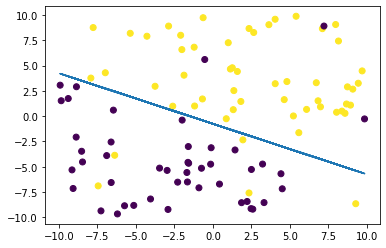

In [153]:
#To generate 100 dataset, dimension = 2
x, y, w, b = dataset(100, 2)
plt_dataset (x, w, b, y)

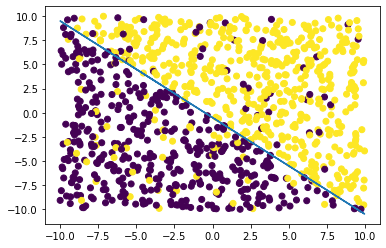

In [155]:
#To generate 1000 dataset, dimension = 2
N = 1000
d = 2
x, y, w, b = dataset(N, 2)
plt_dataset (x, w, b, y)

1.3. Now we are defining the class and functions for the Pocket Learning Algorithm.The algorithm eventually performs the same process as a regular Perceptron, but with each iteration it stores the best performing weights as the 'pocket' weights and at the end returns the best weights as the solution of the learning algorithm

In [156]:
class Pocket:
    # initials
    def __init__(self, w, b, d):
        self.w = w
        self.b = b
        self.d = d
        self.w_pocket = np.zeros(d+1) # initial pocket
    # prediction funct 
    def predict(self, x_data):
        activ = np.dot(x_data, self.w_t[0] + self.w_t[1:])
        return activ

    # fitting values
    def fit(self, X, Y, size = 20):
        self.w_t = np.zeros(self.d+1)
        count = 0
        
        misClass = 1
        minMisclass = 10000
        
        iters = 0
        # iterations
        while (misClass != 0 and (iters<1000)):
            iters += 1
            misClass = 0
            
            # comparing and updating
            i = 0
            while i < X.shape[0]:
                prediction = self.predict(X[i])
                training = Y[i]

                if prediction == 0:
                    prediction = -1
                if training == 0:
                    training = -1

                if (prediction != training):
                    self.w_t[0] = self.w_t[0] + training
                    self.w_t[1:] = self.w_t[1:] + training*x[i]
                    misClass += 1
                i += 1
            # updating pocket 
            if misClass<minMisclass:
                minMisclass = misClass
                self.w_pocket = self.w_t
            
    # results
    def results(self, X, Y):               
        #plt.colors = ['g' if l == 0 else 'b' for l in Y]
        plt.scatter(X[:,0], X[:,1], c=Y)
        #plt.legend()
        plt.plot(X[:,0],-self.w[0]*X[:,0]/self.w[1]-self.b/self.w[1], color='r', label='Original')
        plt.plot(X[:,0],-self.w_pocket[1]*X[:,0]/self.w_pocket[2]-self.w_pocket[0]/self.w_pocket[2], color='b', label='Predicted')
        plt.legend()

1.4. Testing the pocket algorithm function by running it on the previously generated dataset of 1000 samples for T = 1000

Pocket algorithm of original and predicted values


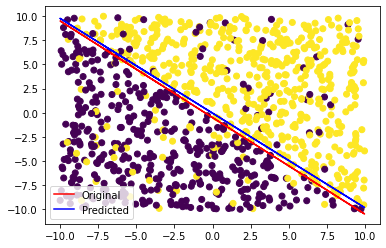

In [157]:
p = Pocket(w, b, d)
print("Pocket algorithm of original and predicted values")
p.fit(x, y)
p.results(x, y)

1.5. Defining the class and its functions for the Linear Regression Algorithm

In [158]:
class LinearReg:
    # initials
    def __init__(self, w, b, d):
        self.w = w
        self.b = b
        self.d = d

    # obtaining weights
    def weights(self, X, Y, d, class_names):
        self.w_lin = np.zeros((len(class_names), d+1))
        X_inv = np.linalg.pinv(X) #pseudo-inverse
        self.w_lin = np.dot(Y, np.transpose(X_inv))
        return self.w_lin
            
    # results for 2D classification 
    def results(self, X, Y):               
        #plt.colors = ['g' if l == 0 else 'b' for l in Y]
        plt.scatter(X[:,0], X[:,1], c=Y)
        #plt.legend()
        plt.plot(X[:,0],-self.w[0]*X[:,0]/self.w[1]-self.b/self.w[1], color='r', label='Original')
        plt.plot(X[:,0],-self.w_lin[1]*X[:,0]/self.w_lin[2]-self.w_lin[0]/self.w_lin[2], color='b', label='Predicted')
        plt.legend()

1.6. Testing the linear regression algorithm function by running it on the previously generated dataset of 1000 samples

Linear Regression of original and predicted values


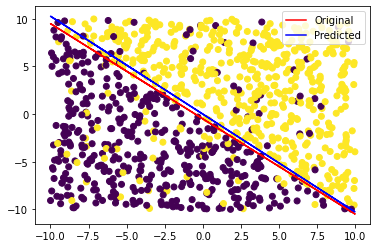

In [159]:
#   Object that would contain the results correspoding the running Linear Regression on the
#   given dataset

l = LinearReg(w, b, d)
print("Linear Regression of original and predicted values")
X0 = np.zeros((x.shape[0],1))
Xnew = np.hstack((X0,x))
l.weights(Xnew, y, d, class_names = [0])

#   Plotting the results of running Linear Regression and it's comparison to the original hypothesis
l.results(x, y)

Considering two graphs above Linear Regression fits the original hypothesis better than the PLA.

1.7. Now to see the difference in the testing Error (1/0) for both algorithms we will need to firstly define and additional function that would compute the error value for each iteration

In [160]:
#   ---------------------------
#   error
#   ---------------------------
#   functional that computes the error for the testing dataset with the pre-estimated weights
#   -> Input: 'x'     - set of samples in the generated datasets
#                        Shape: (A,B) [float]: 
#                               A = number of samples (N),
#                               B = dimension (d)
#              'y'     - set of labels corresponding to the samples in 'c'
#                        Shape: (A) [int]: A = number of samples
#              'w'     - weights of the hypothesis with which labels were assigned
#                        Shape: (A) [int]: A = dimension
#              'N'     - [int] number of points in the dataset
#   -> Output:'err'    - [float] error value for the testing set and given weights 

def error(x, y, w, N):
    X0 = np.zeros((x.shape[0],1))
    Xnew = np.hstack((X0,x))
    h = np.dot(Xnew,w)
    y_new = y
    num = 0
    for i in range(len(y)):
        if y[i] == 0:
            y_new[i] = -1;
        num += np.sign(h[i]) != np.sign(y_new[i])
    err = num/N
    return err

1.8. With the above-defined function we can now go through 100 iterations of implementing both algorithms on the same testing set and observing the performance of both

In [161]:
N = 1000 # number of samples
d = 2 # dimension
E_pocket = np.zeros(100)
E_lin = np.zeros(100)
for iters in range (100):
    x1, y1, w1, b1 = dataset(N, d)
    
    # Pocket Algorithm
    p1 = Pocket(w1, b1, d)
    p1.fit(x1, y1)
    E_pocket[iters] = error(x1, y1, p1.w_pocket, N)
    
    # Linear Regression
    X0 = np.zeros((x.shape[0],1))
    Xnew = np.hstack((X0,x))
    l1 = LinearReg(w1, b1, d)
    l1.weights(Xnew, y1, d, class_names = [0])
    E_lin[iters] = error(x1, y1, l1.w_lin, N)

1.9. Lastly we can observe the resulting testing errors for both algorithmswith each iteration

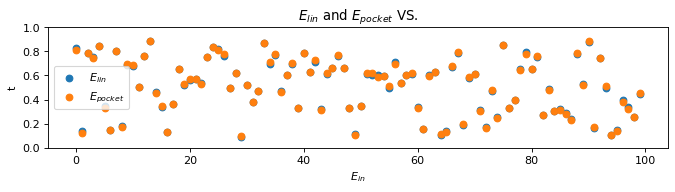

In [163]:
plt.figure(num=None, figsize=(10, 2), dpi=80)
plt.ylim(0, 1)
plt.scatter(range(0,100),E_lin,label='$E_{lin}$')
plt.scatter(range(0,100),E_pocket,label='$E_{pocket}$')
plt.title('$E_{lin}$ and $E_{pocket}$ VS.')
plt.ylabel('t')
plt.xlabel('$E_{in}$')
plt.legend()
plt.show()

It is little hard to see but both errors are almost the same. To make this a little more understandable we could instead calculate the mean difference between the two:

In [164]:
print(np.sum(np.abs(E_lin-E_pocket))/100)

0.005829999999999999


Judging from the results presented above, both algorithm have very similar performance quality in terms of the error. However, when running the iterations it is very noticable how much more time-consuming Pocket Algorithm is in comparison with Linear Regression. Therefore, based on those findings we would highly recommend Linear Regression Algorithm to be used  on this dataset.

## Task 2. Logistic Regression and Gradient Descent

Task 2 was fully designed by Danissa.

2.1. Now we can use it for the actual calculation of the $\nabla E^{(n)}(w)$ and defining the fundamental function for the logistic regression. $\nabla E^{(n)}(w)$ uses the formula of the derivative of the $E^{(n)}(w)$: $\nabla E^{(n)}(w)=\theta(-y_nw^Tx_n)(-y_nx_n)$

In [49]:
#   ---------------------------
#   delta_E
#   ---------------------------
#   Function that calculates the value of the gradient descent (used for the weights update and
#   correction in the Logistic Regression Algorithm)
#   -> Input: 'data'   - Single sample from the dataset
#                        Shape: (A) [float]: A = amount of features in the sample
#             'labels' - Label for the corresponding 'data' sample
#                        Shape: (1) [int {-1 or +1}]
#             'w'      - Set of weights (for one OVA classifier)
#                        Shape: (A) [float]: A = amount of features in the sample -> weights
#             'd'      - VC dimension (length of the weights vector - 1)
#   -> Output: 'dE_in' - value of the gradient descent for the corresponsing sample entered
#                        Shape: (A) [float]: A = amount of features in the sample

def delta_E(data,labels,w,d):
    dE_in = np.zeros(d+1)
    expo = np.dot(data,w)
    expon = expo*labels
    theta = 1.0/(1 + mt.exp(expon))
    dE_in = (theta*(-labels*data))
    return dE_in    

2.2. The next function we will need is the function that will prepare a set of labels of -1 or +1 for each OVA binary classification task. We use the mathematical property of $-1^0=1$ and $-1^1=-1$ to make it more automatic, where power of 1 would be if the event of the current label being equal to the current ONE class in Ove-Versus-All classification, and 0 if this event is false:

In [50]:
#   ---------------------------
#   mult_ult
#   ---------------------------
#   Function that transforms regular multiclass labels to a set of binary OVA classification task
#   labels
#   -> Input:'class_names' - set of all possible classes existing in the multiclass classifier
#                            Shape: (A) [strings or int]: A = amount of existing classes
#              'labels'    - raw set of multiclass labels
#                            Shape: (A) [strings or int]: A = amount of samples/labels in the dataset
#   -> Output:
#           'y_multiclass' - matrix set of the binary classification task labels for
#                            each OVA classifier
#                            Shape: (A,B) [int {-1 or +1}]: 
#                                       A = amount of classes (OVA classifiers),
#                                       B = amount samples/labels for one class

def mult_ult(classes_names,labels):
    a = len(classes_names)
    b = len(labels)
    y_multiclass = []
    for k in range (len(classes_names)):
        y_m_class = []
        for i in range (len(labels)):
            y_m_class.append(pow(-1,(labels[i]!=classes_names[k])))
        y_multiclass.append(y_m_class)
    return y_multiclass

2.3. Next we build a Logistic regression learning algorithm itself according to the previous lectures and the project manual using previous formula for $\nabla E^{(n)}(w)$ to correct the weights vector in each iteration.

We also changed the 'randomly pick one n from {1,2,...,N} for each iteration'(it is commented out in the code below) part because it has proven itself to be very inefficient, since the training set that is actually used in the process of learning becomes smaller that the original. Since randomly picking n might result in often iterations over the same samples and is not enough for training to be successful.

In [51]:
#   ---------------------------
#   log_reg
#   ---------------------------
#   Function that calculates the value of the gradient descent (used for the weights update and
#   correction in the Logstic Regression Algorithm)
#   -> Input: 'data'   - Set of samples for training
#                        Shape: (A,B) [float]: A = amount of samples,
#                                              B = amount of features in the sample
#             'labels' - matrix of multiclass labels (generated for each OVA classifier)
#                        Shape: (A,B) [int {-1 or +1}]: 
#                                              A = amount of classes (OVA classifiers),
#                                              B = amount samples/labels for one class
#             'd'      - [int] VC dimension (length of the weights vector - 1)
#             'T'      - [int] amount of iterations in learning algorithm
#             'nu'     - [float] learning rate
#        'class_names' - set of all possible classes existing in the multiclass classifier
#                        Shape: (A) [strings or int]: A = amount of existing classes
#   -> Output: 'w'     - set of weights for each OVA classifier in multiclass classification
#                        Shape: (A,B) [float]: A = amount of OVA classifier (amount of classes),
#                                              B = number of weights per OVA classifier
#             'Et'     - list of in sample Errors for each iteration
#                        Shape: (T) [strings or int]

def log_reg(data,labels,d,T,nu,class_names):
    w = np.zeros([len(class_names),d+1]) # initializing weights = [0.0,...,0.0]
    Et = [] # intializing an empty list to store E_in values
    for c in range (len(class_names)):
        Et_n = []
        for t in range (T):
            err = 0.0
            #n=np.random.randint(N)
            #E = delta_E(data[n],labels[n],w,d)
            #w = w - nu*E   
            for n in range (len(labels[0])):
                E = delta_E(data[n],labels[c][n],w[c],d) # calculating correction vector for weights
                w[c] = w[c] - nu*E                       # updating the weights
            for n in range (len(labels[0])):             # E_in error for this iteration
                err = err + np.log(1 + mt.exp(-labels[c][n]*np.dot(data[n],w[c])))
            Et_n.append(err/len(labels[0])) # adding error of the current iteration to the list
        Et.append(Et_n)
    return w, Et    

2.4. The last two functions that are needed would be for working with the test data after obtaining complex weights for the OVA classification task. 

The first function prob() would be to compute probability that the sample corresponds to the a certain class. We do so by using sigmoid function on the incoming sample and weights for one binary classifier.

The second function multiclass uses calculated weights from the pre-trained model to classify new incoming samples (testing samples) by choosing the class that the sample most probably corresponds to.

In [52]:
#   ---------------------------
#   prob
#   ---------------------------
#   Function that calculates the value of the gradient descent (used for the weights update and
#   correction in the Logstic Regression Algorithm)
#   -> Input: 'x'      - Single sample from the dataset (its feature values)
#                        Shape: (A) [float]: A = amount of features in the sample
#             'w'      - Set of weights (for one OVA classifier)
#                        Shape: (A) [float]: A = amount of features in the sample -> weights
#   -> Output:'p'      - Probability of the sampe 'x' corresponding to the class for which weights
#                        are given to the function
#                        [float] probability value

def prob(x,w):
    p = 1/(1 + mt.exp(-np.dot(x,w)))
    return p

#   ---------------------------
#   multiclass
#   ---------------------------
#   Function that calculates the value of the gradient descent (used for the weights update and
#   correction in the Logstic Regression Algorithm)
#   -> Input: 'test'   - Set of samples for testing
#                        Shape: (A,B) [float]: A = amount of samples,
#                                              B = amount of features in the sample
#             'labels' - List of correct labels/classes for the testing set
#                        Shape: (A) [strings or ints, depends on classes]: 
#                                              A = amount of samples,
#             'w'      - set of weights for each OVA classifier in multiclass classification
#                        Shape: (A,B) [float]: A = amount of OVA classifier (amount of classes),
#                                              B = number of weights per OVA classifier
#        'class_names' - set of all possible classes existing in the multiclass classifier
#                        Shape: (A) [strings or int]: A = amount of existing classes
#   -> Output: 
#          'given_l'   - list of labels predicted by the learning algorithm (using weights)
#                        Shape: (A) [strings or ints, depends on classes]: 
#                                              A = amount of samples,

def multiclass(test,labels,w,classes_names):
    given_l = []
    probs = np.zeros(len(classes_names))
    for n in range (len(labels)):
        for c in range (len(classes_names)):
            probs[c] = prob(test[n],w[c])
        given_l.append(classes_names[np.argmax(probs)])
    return given_l

2.5. Now that all of the essential functions are defined we test our Logistic Regression algorithm on the IRIS dataset:

Learning finished...
Testing accuracy [%]:  100.0
Error in testing:  0.0


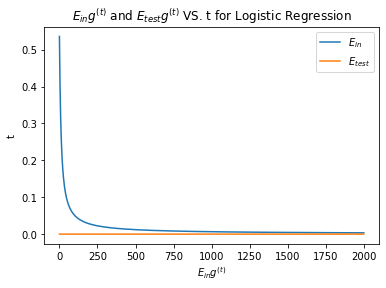

In [30]:
#   Dividing dataset into samples and labels
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

#   Splitting samples and labels into training sets and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123, stratify=y)

#   Identifying the class names for future usage and generating multiclass labels for OVA
#   using 'mult_ult()'' function
classes = ['setosa', 'versicolor', 'virginica']
y_m_train = mult_ult(classes, y_train)

#   Learning from the training dataset and calculating weights for the 
#   final hypothesis using Logistic Regression function
weight_multi, Error_in = log_reg(X_train,y_m_train,3,2000,0.001,classes)
print("Learning finished...")

#   Using learned weights to predict labels for the testing set with 'multiclass()' function
pred_y = multiclass(X_test,y_test,weight_multi, classes)

#   Printing the results of testing our final hypothesis
print("Testing accuracy [%]: ", end = " ")
print(100*np.sum(pred_y==y_test)/float(len(y_test)))
E_test = 100*np.sum(pred_y!=y_test)/float(len(y_test))
print("Error in testing: ", end = " ")
print(E_test)

#   Plotting In-sample and Out-of-sample Error functions depending on t (0 to T = 2000)
#   in this case since out-of-sample error does not depend on T it is visualised as a 
#   straight line
plt.plot(range(0,2000),Error_in[0],label='$E_{in}$')
plt.plot(range(0,2000),E_test*range(0,2000),label='$E_{test}$')
plt.title('$E_{in}g^{(t)}$ and $E_{test}g^{(t)}$ VS. t for Logistic Regression')
plt.ylabel('t')
plt.xlabel('$E_{in}g^{(t)}$')
plt.legend()
plt.show()

From the graph above it could be seen that the in-sample error very quickly approaches smaller values, which are closer to 0, therefore taking around 500-1000 epoch should be enough for a good result in testing.

## Task 3. Practical Design of Learning Algorithms

Task 3 was firstly designed by Danissa, also Danissa integrated to the functions logistic regression model. Karina - linear regression model. Then the Validation curves were coded by Danissa, the GridSearchCV integrated and tested by Karina.

We start by downloading the dataset that is going to be used the task

In [35]:
#   Loading the digits dataset from sklearn package
from sklearn import datasets
digits = datasets.load_digits()

3.1. Firstly we need to write a function that divides the given dataset consisting of data and labels into N dosjoint sets. In this case we use the ready function train_test_split() because it provides important properties like stratification already inside of it

In [70]:
#   ---------------------------
#   folds
#   ---------------------------
#   Function that divides the given dataset into N disjoint datasets
#   -> Input: 'data'   - samples of the dataset
#                        Shape: (A,B) [float]: A = amount of samples,
#                                              B = amount of features in one sample
#            'labels'  - sel of labels corresponding to the dataset
#              'N'     - [int] number of sets (N-fold)
#   -> Output: 'S'     - matrix of all folds generated
#                        Shape: (A,B,C) [float]: A = amount folds,
#                                                B = number of samples in each fold
#                                                C = number of features in each sample
#              'y'     - matrix of all labels for each corresponding fold
#                        Shape: (A,B)   [int]:   A = amount folds,
#                                                B = number of samples/labels in each fold

def folds(data,labels,N):
    S_n = [] # final set of folds with samples
    S = []   # each future fold of samples to be 'cut out'
    y_n = [] # final set of folds with labels
    y = []   # each future fold of labels to be 'cut out'
    for n in range (N): # 'cutting out' the fold using train_test_split function
        X_new, S_n, y_new, y_n = train_test_split(data, labels, test_size = 1/N, stratify=labels)
        S.append(S_n) # putting newly created fold to the final set of folds
        y.append(y_n)
    return S,y

3.2. After that we can define the function that is going to be performing the K-folds cross validation itself

In [73]:
#   Defining all existing classes
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
acc = 0.0 # accuracy value for each fold

#   Samples that are going to be used in the cross validation
#   Not all samples are used for the convenience of the running time and division of the set
X = digits.data[:1000]
y = digits.target[:1000]

#   ---------------------------
#   folds_train
#   ---------------------------
#   Function that analyzes the performance of the given K-fold validation for the algorithm and
#   data provided
#   -> Input:'algorithm'   - [string] name of the algorithm to be tested ('log_reg' or 'lin_reg')
#                'X'       - samples of the dataset
#                            Shape: (A,B) [float]: A = amount of samples,
#                                                  B = amount of features in one sample
#                'y'       - matrix of all labels for each corresponding fold
#                            Shape: (A,B)   [int]: A = amount folds,
#                                                  B = number of samples/labels in each fold
#                'F'       - [int] number of folds
#   -> Output:   print testing accuracy and error for each fold, and average/generalization error
#                of the validation

def folds_train(algorithm,X,y,F):
    E_testing = 0.0 # testing error
    #   Splitting the dataset into F amount of folds
    X_folds, y_folds = folds(X,y,F)
    
    for i in range (F): #for each fold
        print("Fold number", end = " ")
        print(i+1, end = " -----------------------")
        print(" ")
        n=0
        k=0
        #   Assigning current fold to be the testing set
        X_testing = X_folds[i]
        X_training = []
        y_testing = y_folds[i]
        y_training = []
        #   Assigning all folds except for the current fold to be in the training set
        while k < F:
            n = k
            if (n == i):
                if n < F-1:
                    n = n + 1
                    k = k + 1
                else:
                    break
            X_training.append(X_folds[n])
            y_training.append(y_folds[n])
            k = k + 1
        #   Since our function do not work with 3-D matrices we need to flatten them back
        X_training_flatten = []
        y_training_flat = []
        #   Manually flattening by traversing through each element
        for b in range(len(y_training)): #Traversing through the main list
            for c in range (len(y_training[b])): #Traversing through each sublist
                y_training_flat.append(y_training[b][c])
        for g in range(len(X_training)):
            for t in range(len(X_training[g])):
                X_training_flatten.append(X_training[g][t])
        #   Now we can use the labels to generate multiclass sets of labels
        y_multi_training = mult_ult(classes,y_training_flat)
        #   Calculating weights using chosen algorithm
        if (algorithm == 'log_reg'):
            weight_multi2, Error_in2 = log_reg(X_training_flatten,y_multi_training,63,100,0.01,classes)
        elif (algorithm == 'lin_reg'):
            lin = LinearReg(w,b,d);
            weight_multi2 = lin.weights(X_training_flatten, y_multi_training, 63, classes)
        #   Calculating and comparing predictions, calculating accuracy and testing error
        pred_y = multiclass(X_testing,y_testing,weight_multi2, classes)
        acc = 100*np.sum(pred_y==y_testing)/float(len(y_testing))
        E_testing = E_testing + np.sum(pred_y!=y_testing)/float(len(y_testing))
        print("Testing accuracy [%]:", end = " ")
        print(acc, end = " | Error: ")
        print(np.sum(pred_y!=y_testing)/float(len(y_testing)))
    print("Average error:", end = " ")
    print(E_testing/F) # generalization error

3.3. Now we test out K-folds CV functions on Logistic and Linear Regression algorithms

In [59]:
print("----------------------------------- 5 FOLDS -----------------------------------")
folds_train('log_reg',X,y,5)
print("----------------------------------- 10 FOLDS -----------------------------------")
folds_train('log_reg',X,y,10)
print("----------------------------------- 20 FOLDS -----------------------------------")
folds_train('log_reg',X,y,20)

----------------------------------- 5 FOLDS -----------------------------------
Fold number 1 ----------------------- 
Testing accuracy [%]: 95.0 | Error: 0.05
Fold number 2 ----------------------- 
Testing accuracy [%]: 99.5 | Error: 0.005
Fold number 3 ----------------------- 
Testing accuracy [%]: 89.0 | Error: 0.11
Fold number 4 ----------------------- 
Testing accuracy [%]: 97.5 | Error: 0.025
Fold number 5 ----------------------- 
Testing accuracy [%]: 96.5 | Error: 0.035
Average error: 0.045
----------------------------------- 10 FOLDS -----------------------------------
Fold number 1 ----------------------- 
Testing accuracy [%]: 98.0 | Error: 0.02
Fold number 2 ----------------------- 
Testing accuracy [%]: 97.0 | Error: 0.03
Fold number 3 ----------------------- 
Testing accuracy [%]: 97.0 | Error: 0.03
Fold number 4 ----------------------- 
Testing accuracy [%]: 96.0 | Error: 0.04
Fold number 5 ----------------------- 
Testing accuracy [%]: 100.0 | Error: 0.0
Fold number 6 -

In the case with Logistic Regression we can actually see the traid-off between increasing validation set and thus decreasing the training set. Meaning that after a certain point of increasing K testing set becomes to small, and algorithms starts to try to overfit the points in the training dataset. Accordingly, from the results above 10-fold cross validation seems like a more reasonable approach for Logistic regression.

In [74]:
print("----------------------------------- 5 FOLDS -----------------------------------")
folds_train('lin_reg',X,y,5)
print("----------------------------------- 10 FOLDS -----------------------------------")
folds_train('lin_reg',X,y,10)
print("----------------------------------- 20 FOLDS -----------------------------------")
folds_train('lin_reg',X,y,20)

----------------------------------- 5 FOLDS -----------------------------------
Fold number 1 ----------------------- 
Testing accuracy [%]: 97.5 | Error: 0.025
Fold number 2 ----------------------- 
Testing accuracy [%]: 96.5 | Error: 0.035
Fold number 3 ----------------------- 
Testing accuracy [%]: 93.5 | Error: 0.065
Fold number 4 ----------------------- 
Testing accuracy [%]: 96.0 | Error: 0.04
Fold number 5 ----------------------- 
Testing accuracy [%]: 94.0 | Error: 0.06
Average error: 0.045
----------------------------------- 10 FOLDS -----------------------------------
Fold number 1 ----------------------- 
Testing accuracy [%]: 97.0 | Error: 0.03
Fold number 2 ----------------------- 
Testing accuracy [%]: 97.0 | Error: 0.03
Fold number 3 ----------------------- 
Testing accuracy [%]: 93.0 | Error: 0.07
Fold number 4 ----------------------- 
Testing accuracy [%]: 92.0 | Error: 0.08
Fold number 5 ----------------------- 
Testing accuracy [%]: 94.0 | Error: 0.06
Fold number 6 -

Interestingly, this doesn't quite work the same with the Linear Regression case. This probably ust indicates that the model is trying to fit the $E_{val}$ to the shape of $E_{test}$ but from the above of the curve. However, we can also now compare the two and see that $E_{val}$ is evidently smaller for the Logistic Regression case, but it takes a lot more time to estimate in comparison to Linear Regression because of the different nature of those algorithms

3.4 The last validation is the Leave-One-Out Cross Validation. Which makes 1 point to be the validation set and N-1 points to be the training set. It is known to be the most reliable in estimating $E_{val}$ to be close to actual $E_{test}$ since each $e_{in}$ in this validation is an unibased estimate for $E_{test}(g_n)$. But there is also a price to pay in terms of the computational power it is taking to actually run this.

In [61]:
#   ---------------------------
#   loocv
#   ---------------------------
#   Function that analyzes the performance of the given Leave-One-Out cross validation for the
#   algorithm and data provided
#   -> Input:'algorithm'   - [string] name of the algorithm to be tested ('log_reg' or 'lin_reg')
#                'X'       - samples of the dataset
#                            Shape: (A,B) [float]: A = amount of samples,
#                                                  B = amount of features in one sample
#                'y'       - matrix of all labels for each corresponding fold
#                            Shape: (A,B)   [int]: A = amount folds,
#                                                  B = number of samples/labels in each fold
#   -> Output:   print testing accuracy and error for each fold, and average/generalization error
#                of the validation

def loocv(algorithm,X,y):
    E_testing = 0.0# testing error
    F = len(y) 
    
    #   This progress bar is included for the convenience of running since it take few hours to run
    pbar = tqdm()
    pbar.reset(total = F)
    
    for i in range(F): #for each fold
        n=0
        k=0
        #   Assigning current point to be the testing set
        X_testing = [X[i]]
        X_training = []
        y_testing = [y[i]]
        y_training = []
        #   Assigning all folds except for the current point to be in the training set
        while k < F:
            n = k
            if (n == i):
                if n < F-1:
                    n = n + 1
                    k = k + 1
                else:
                    break
            X_training.append(X[n])
            y_training.append(y[n])
            k = k + 1
        #   Now we can use the labels to generate multiclass sets of labels
        y_multi_training = mult_ult(classes,y_training)
        #   Calculating weights using chosen algorithm
        if (algorithm == 'log_reg'):
            weight_multi2, Error_in2 = log_reg(X_training,y_multi_training,63,100,0.01,classes)
        elif (algorithm == 'lin_reg'):
            lin = LinearReg(w,b,d);
            weight_multi2 = lin.weights(X_training, y_multi_training, 63, classes)
        #   Calculating and comparing predictions, calculating accuracy and testing error
        pred_y = multiclass(X_testing,y_testing,weight_multi2, classes)
        E_testing = E_testing + np.sum(pred_y!=y_testing)/float(len(y_testing))
        pbar.update()
    pbar.refresh()
    print("Average error:", end = " ")
    print(E_testing/F) # generalization error

Now we test our loocv() validation functions:

In [63]:
loocv('log_reg',X,y)
# the first outputed line is a part of the progress bar command and could be just ignored

Average error: 0.064


In [62]:
loocv('lin_reg',X,y)
# the first outputed line is a part of the progress bar command and could be just ignored

Average error: 0.055


Firstly, Linear regression obviously performs way faster than Logistic regression does. Secondly, assuming that for Leave-One-Out validation $E_{val}$ is pretty close to actual $E_{test}$, we can conclude that Linear Regression also performs with better accuracy and precision.

3.5. Using GridSearchCV and learning curve() we are now analyzing each algorithm's dependence on the parameters, and performing cross-validation with various test sizes with the corresponding validation error. This would give us a good estimate of how well each model approximates $E_{val}$ to $E_{test}$

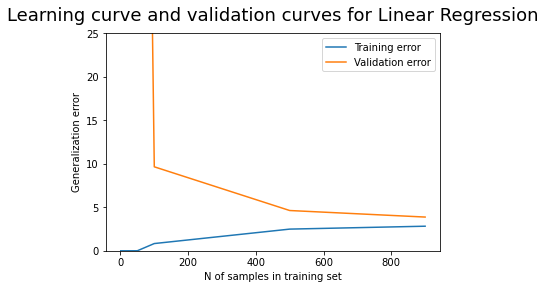

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression

train_sizes = [1, 50, 100, 500, 900]
train_sizes, train_scores, validation_scores = learning_curve(LinearRegression(), X, y, train_sizes = train_sizes, cv = 10, scoring = 'neg_mean_squared_error')
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Generalization error')
plt.xlabel('N of samples in training set')
plt.title('Learning curve and validation curves for Linear Regression', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,25)
plt.show()

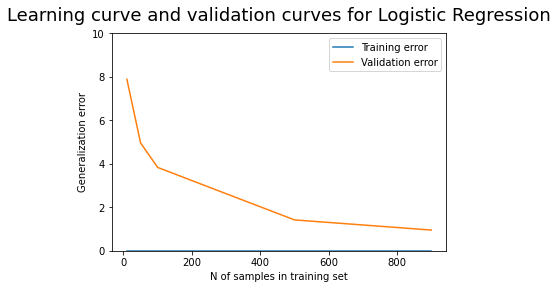

In [112]:
train_sizes = [10, 50, 100, 500, 900]
train_sizes, train_scores, validation_scores = learning_curve(LogisticRegression(max_iter = 100000), X, y, train_sizes = train_sizes, cv = 10, scoring = 'neg_mean_squared_error')
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Generalization error')
plt.xlabel('N of samples in training set')
plt.title('Learning curve and validation curves for Logistic Regression', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,10)
plt.show()

From the graphs above it could be clearly seen that Linear Regression does a better job when it comes to fitting $E_{val}$ to be a good estimate of $E_{test}$. As the training set size becomes bigger, validation curve also becomes closer to the training curve. That means that the model has **low variance** - gap between validation and training error. However, since training error relatively high, it means that the training data is not fitted well enough by the model. In over words it means that the model has a **high bias** with respect to that set of data. This set of outcomes usually means that our algorithm **underfits the training data**. 

While the Logistic Regression's case is completely the opposite. Since it's training error is significantly small it means that the algorithm performs extremely good on the trainig set - has **low bias**. But at the same time the gap between the validation error and training error is almost as goodas that of the Linear Regression (aproximately 1),  meaning that the model **doesn't overfit the data**, because the gap is getting smaller and smaller. **Therefore, Logistic Regression is performing better (but takes more time!)**

In [107]:
from sklearn.model_selection import  GridSearchCV as GridS 

Log_reg = LogisticRegression(max_iter = 100000)
Lin_reg = LinearRegression() 

#Linear regression
grid_lin_par = { 'fit_intercept': [1]}
grid_lin = GridS(Lin_reg, grid_lin_par, cv = 10)
grid_lin.fit(X, y) #fitting
print('Linear regression best score = ', grid_lin.best_score_ ) 

#Logistic regression
grid_log_par = { 'penalty': ['l2']}
grid_log = GridS(Log_reg, grid_log_par, cv = 10)
grid_log.fit(X, y) # fitting
print('Logistic regression best score = ', grid_log.best_score_ )

Linear regression best score =  0.5248134015128564
Logistic regression best score =  0.9480000000000001


The best scored of the grid search function above also show that Logistic regression performs significantly better than the Linear regression.

## Task 4. KAGGLE Competition

#### Fashon - MNIST Task
Firstly we import the MNIST dataset

In [12]:
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# The data from the Kaggle is already splitted on Test and Train
# Importing from your file path:
fashion_test = pd.read_csv (r'fashion-mnist_test.csv')
fashion_train = pd.read_csv (r'fashion-mnist_train.csv')

Now we are dividing the datat into set of samples and the set of labels corresponding to those samples

In [13]:
#Splitting the dataset into X and Y:
y_test = fashion_test.iloc[:, 0]
y_train = fashion_train.iloc[:, 0]
x_test = fashion_test.iloc[:, 1:]
x_train = fashion_train.iloc[:, 1:]

The first model that we are going to try to use is the Linear Regression Algorithm predefined in the scikit-learn packages

In [14]:
Lin_reg = LinearRegression() 

Lin_reg.fit(x_train, y_train)
y_pred = Lin_reg.predict(x_test)
print("Linear Regression score on test set =", Lin_reg.score(x_test, y_test))
print("Linear Regression score on train set =", Lin_reg.score(x_train, y_train))

Linear Regression score on test set = 0.7619567491522429
Linear Regression score on train set = 0.7724268140062857


Both scores on training data and on testing data do not seem to be exactly what would be considered a good solution, so we are going to try Logistic Regression now

In [145]:
Log_reg = LogisticRegression(max_iter=500000)

Log_reg.fit(x_train, y_train)
y_pred = Log_reg.predict(x_test)
print("Logistic Regression score on test set =", Log_reg.score(x_test, y_test))
print("Logistic Regression score on train set =", Log_reg.score(x_train, y_train))

C:\Users\danissa_s\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression score on test set = 0.8383
Logistic Regression score on train set = 0.88525


And one of the last algorithms that we are familiar with is PLA or Pocket Learning Algorithm, so we are also going to try it as well

In [6]:
Pla = Perceptron()

In [168]:
Pla.fit(x_train, y_train)
y_pred = Pla.predict(x_test)
print("PLA score on test set =", Pla.score(x_test, y_test))
print("PLA score on train set =", Pla.score(x_train, y_train))

PLA score on test set = 0.8075
PLA score on train set = 0.8207666666666666


Now let's see the cross validation scores for the algorithms of Linear Regression and PLA

In [10]:
from sklearn.model_selection import cross_val_score

scores_pla = cross_val_score(Pla, x_train, y_train, cv=100) # this takes a LOT of time
print(np.mean(scores_pla)) 

0.7976333333333333


In [15]:
scores_lin = cross_val_score(Lin_reg, x_train, y_train, cv=100)
print(np.mean(scores_lin))

0.7638177423390101


The best out of all tried algorithms is so far Logistic regression so we choose it to get our final hypothesis, even though there is a warning and time-consuming issue.

## Discussion

We succussfully implemented the models Linear regression and Logistic regression. The limitations of the project is that we did not checked the Logistic regression model on cross validation score in Task 4 to compare values. The reason is the time consuming of its implemetation and the warning message. We think that the warning message can be overcomed by increasing the max_iter value, even though it again will need more time. Most probably our algorythms are not ideal ones, but with more experience we will improve our skills